In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [222]:
dataframe = pd.read_csv("DataSet_Salud_fetal_Balanceado.csv",sep=";")
dataframe = dataframe.dropna()
clasificadores = ['Normal', 'Sospechoso', 'Patologico']

In [223]:
dataframe.head(10)
dataframe.describe()
dataframe.groupby("Salud_fetal").size()

Salud_fetal
0    1655
1    1655
2    1655
dtype: int64

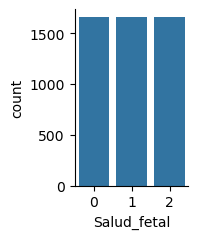

In [224]:
import seaborn as sb
sb.catplot(x = "Salud_fetal",data=dataframe,kind="count",height=2.5, aspect=.8)

In [225]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in dataframe.select_dtypes(include=['object']).columns:
    dataframe[column] = label_encoder.fit_transform(dataframe[column])

In [226]:
# Separar variables independientes y dependiente de mi dataframe en x y
y = dataframe['Salud_fetal']
x = dataframe.drop('Salud_fetal', axis=1)

In [227]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=30)

modelo = RandomForestClassifier(n_estimators=80, random_state=25)
modelo.fit(x_train, y_train)
predicciones = modelo.predict(x_test)

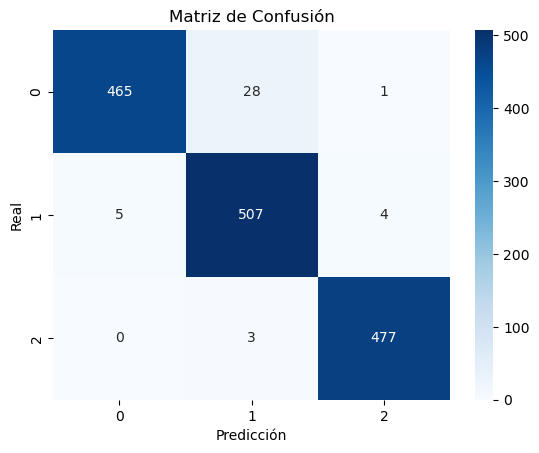

              precision    recall  f1-score   support

      Normal       0.99      0.94      0.96       494
  Sospechoso       0.94      0.98      0.96       516
  Patologico       0.99      0.99      0.99       480

    accuracy                           0.97      1490
   macro avg       0.97      0.97      0.97      1490
weighted avg       0.97      0.97      0.97      1490



In [228]:
# Matriz de confusión
cm = confusion_matrix(y_test, predicciones)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

# Reporte de clasificación
clasificadores = ['Normal', 'Sospechoso', 'Patologico']
print(classification_report(y_test, predicciones, target_names=clasificadores))

In [229]:
tasa_error = []
for n in estimadores:
    modelo_rf = RandomForestClassifier(n_estimators=n, random_state=25)
    modelo_rf.fit(x_train, y_train)
    prediccion_i = modelo_rf.predict(x_test)
    error = np.mean(prediccion_i != y_test)
    tasa_error.append(error)

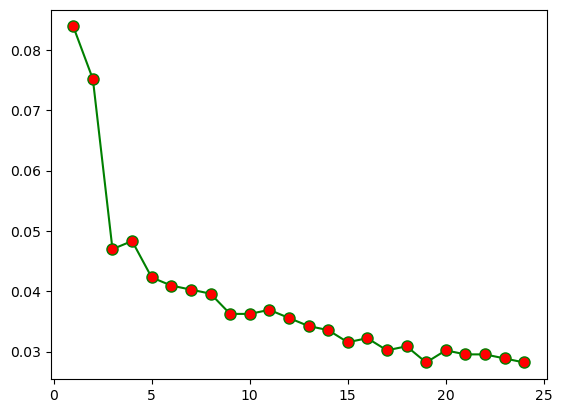

In [230]:
valores = range(1, 25)
plt.plot(estimadores, tasa_error, color="green", marker="o", markerfacecolor="red", markersize=8)

In [231]:
modelo_rf_optimo = RandomForestClassifier(n_estimators=19, random_state=25)
modelo_rf_optimo.fit(x_train, y_train)

RandomForestClassifier(n_estimators=19, random_state=25)

In [232]:
# Predecir los resultados con el modelo optimizado
predicciones_optimas = modelo_rf_optimo.predict(x_test)

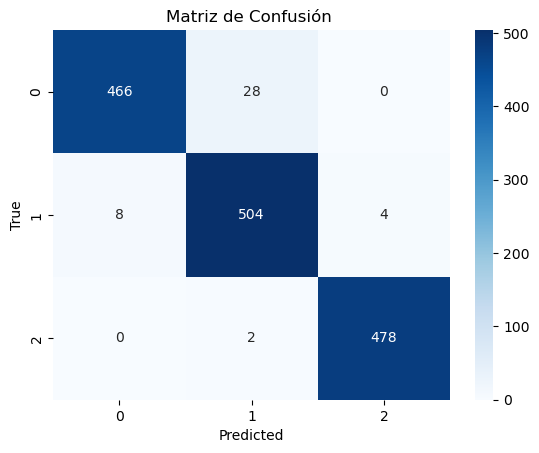

In [233]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix, classification_report

cm_optima = confusion_matrix(y_test, predicciones_optimas)
sns.heatmap(cm_optima, annot=True, fmt="d", cmap="Blues")
plt.title('Matriz de Confusión ')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [234]:
# Reporte de clasificación
clasificadores = ['Normal', 'Sospechoso', 'Patologico']
print(classification_report(y_test, predicciones_optimas, target_names=clasificadores))

              precision    recall  f1-score   support

      Normal       0.98      0.94      0.96       494
  Sospechoso       0.94      0.98      0.96       516
  Patologico       0.99      1.00      0.99       480

    accuracy                           0.97      1490
   macro avg       0.97      0.97      0.97      1490
weighted avg       0.97      0.97      0.97      1490



In [235]:
#Predicción individual
print(modelo_rf_optimo.predict([[120,0,0,0,0,0,0,73,0.5,43,2.4,64,62,126,2,0,120,137,121,63,1]]))
print(modelo_rf_optimo.predict_proba([[120,0,0,0,0,0,0,73,0.5,43,2.4,64,62,126,2,0,120,137,121,63,1]]))

[1]
[[0.05263158 0.84210526 0.10526316]]


C:\Users\PC_HELBER\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\PC_HELBER\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [236]:
import joblib

In [237]:
from sklearn.ensemble import RandomForestClassifier

# Entrenar el modelo con el número óptimo de estimadores (19)
modelo_rf_optimo = RandomForestClassifier(n_estimators=19, random_state=25)
modelo_rf_optimo.fit(x_train, y_train)

# Guardar el modelo entrenado
joblib.dump(modelo_rf_optimo, 'modelo_randomforest.pkl')

# Guardar los nombres de las columnas del dataset
joblib.dump(x.columns.tolist(), 'columnas_modelo.pkl')

print("Modelo y columnas guardados exitosamente.")


Modelo y columnas guardados exitosamente.
